In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#importing functions for feature engineering
from config import BASE_PROCESSED_PATH
from features import add_rolling_stats, add_lag_features,\
    scale_features,add_delta_features,drop_correlated_features,process_dataset

### Working on test dataset (FD001)

In [4]:
#loading dataset
df = pd.read_csv(f'{BASE_PROCESSED_PATH}/FD001/train_FD001.csv')
df.head()


,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL,label
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0


In [5]:
df.shape

(20631, 28)

In [6]:
sensor_cols = [col for col in df.columns if 'sensor_' in col]
print(sensor_cols)

['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21']


In [7]:
#Dropping uninformative or flatline sensors
flat_sensors = [col for col in sensor_cols if df[col].std() < 0.1]
print("Flat sensors:",flat_sensors)

Flat sensors: ['sensor_1', 'sensor_5', 'sensor_6', 'sensor_8', 'sensor_10', 'sensor_13', 'sensor_15', 'sensor_16', 'sensor_18', 'sensor_19']


In [8]:
df.drop(columns=flat_sensors,inplace=True)
df.sample(5)

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_9,sensor_11,sensor_12,sensor_14,sensor_17,sensor_20,sensor_21,RUL,label
17341,86,2,0.0034,-0.0005,100.0,642.41,1602.39,1407.07,553.84,9067.94,47.51,521.68,8138.02,393,38.97,23.3046,276,0
18171,89,163,-0.0028,0.0002,100.0,642.63,1595.61,1408.92,553.83,9060.10,47.76,521.04,8136.72,394,38.79,23.3476,54,0
1311,7,8,-0.0007,-0.0005,100.0,642.41,1586.97,1401.42,554.05,9064.80,47.19,522.26,8146.34,392,38.95,23.3810,251,0
9452,48,188,0.0018,0.0000,100.0,642.34,1593.36,1405.29,553.74,9125.49,47.65,521.82,8198.76,393,38.72,23.2895,43,0
4374,22,12,-0.0010,0.0002,100.0,642.72,1586.77,1413.64,552.90,9039.84,47.59,520.83,8123.69,393,38.84,23.1621,190,0


In [9]:
#updating sensors by removing uninformative sensors
sensor_cols = [col for col in sensor_cols if col not in flat_sensors]
print(sensor_cols)

['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_14', 'sensor_17', 'sensor_20', 'sensor_21']


In [10]:
#adding delta feature 
df = add_delta_features(df,sensor_cols)
df.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_9,...,sensor_3_delta,sensor_4_delta,sensor_7_delta,sensor_9_delta,sensor_11_delta,sensor_12_delta,sensor_14_delta,sensor_17_delta,sensor_20_delta,sensor_21_delta
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,554.36,9046.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,553.75,9044.07,...,2.12,2.54,-0.61,-2.12,0.02,0.62,-7.13,0.0,-0.06,0.0046
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,554.26,9052.94,...,-3.83,1.06,0.51,8.87,-0.22,0.14,1.74,-2.0,-0.05,-0.0794
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,554.45,9049.48,...,-5.20,-2.33,0.19,-3.46,-0.14,0.44,0.60,2.0,-0.07,0.0297
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,554.00,9055.15,...,0.06,4.35,-0.45,5.67,0.15,-0.67,-0.03,1.0,0.02,0.0305


In [11]:
#Lag features
df = add_lag_features(df,sensor_cols)
df.sample(5)

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_9,...,sensor_12_lag_1,sensor_12_lag_2,sensor_14_lag_1,sensor_14_lag_2,sensor_17_lag_1,sensor_17_lag_2,sensor_20_lag_1,sensor_20_lag_2,sensor_21_lag_1,sensor_21_lag_2
4813,24,81,0.0025,-0.0004,100.0,642.72,1594.25,1401.01,553.45,9056.38,...,521.37,522.04,8142.24,8143.56,392.0,392.0,38.84,39.11,23.2933,23.4013
18258,90,33,0.0024,-0.0004,100.0,642.45,1585.96,1406.16,553.72,9050.51,...,522.42,522.48,8138.40,8137.21,392.0,390.0,38.98,39.11,23.3424,23.4237
3209,16,114,0.0029,-0.0003,100.0,643.27,1590.16,1416.38,552.93,9056.34,...,521.68,521.35,8137.09,8135.31,394.0,394.0,38.71,38.82,23.2357,23.1502
12416,63,110,-0.0037,0.0006,100.0,642.77,1598.25,1413.02,553.62,9071.24,...,521.28,521.24,8151.98,8149.72,394.0,393.0,38.75,38.67,23.2314,23.2416
16283,81,146,0.0010,0.0002,100.0,642.89,1589.49,1408.06,552.84,9064.71,...,521.24,521.43,8145.18,8144.41,393.0,393.0,38.59,39.02,23.3877,23.2850


In [12]:
#rolling statistics
df = add_rolling_stats(df,sensor_cols)
df.sample(5)

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_9,...,sensor_12_roll_mean,sensor_12_roll_std,sensor_14_roll_mean,sensor_14_roll_std,sensor_17_roll_mean,sensor_17_roll_std,sensor_20_roll_mean,sensor_20_roll_std,sensor_21_roll_mean,sensor_21_roll_std
4954,25,75,-0.0011,-0.0003,100.0,642.47,1589.05,1405.36,553.00,9047.54,...,521.810000,0.141067,8127.316667,4.750898,392.333333,0.57735,38.890000,0.030000,23.307100,0.016350
937,5,91,-0.0052,-0.0001,100.0,642.40,1584.88,1397.86,554.37,9066.54,...,522.446667,0.210792,8151.820000,0.229129,392.000000,1.00000,39.020000,0.137477,23.415867,0.061175
20619,100,189,0.0015,0.0001,100.0,643.69,1599.85,1423.15,551.61,9069.69,...,519.876667,0.337095,8140.070000,0.372424,396.000000,1.00000,38.560000,0.173494,23.115033,0.100276
3515,17,211,-0.0009,-0.0004,100.0,642.52,1589.79,1412.93,554.08,9105.01,...,521.446667,0.405134,8170.890000,2.914635,392.666667,0.57735,38.696667,0.102632,23.331433,0.057731
6552,33,141,-0.0005,-0.0003,100.0,642.83,1582.29,1396.38,552.46,9059.45,...,521.680000,0.111355,8145.080000,2.493812,393.000000,0.00000,38.866667,0.189033,23.335500,0.074478


In [13]:
df.isnull().sum()

unit_number              0
time_in_cycles           0
op_setting_1             0
op_setting_2             0
op_setting_3             0
                      ... 
sensor_17_roll_std     200
sensor_20_roll_mean    200
sensor_20_roll_std     200
sensor_21_roll_mean    200
sensor_21_roll_std     200
Length: 73, dtype: int64

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

unit_number            0
time_in_cycles         0
op_setting_1           0
op_setting_2           0
op_setting_3           0
                      ..
sensor_17_roll_std     0
sensor_20_roll_mean    0
sensor_20_roll_std     0
sensor_21_roll_mean    0
sensor_21_roll_std     0
Length: 73, dtype: int64

In [16]:
#normalizing the features
feature_cols = [col for col in df.columns if ('sensor_' in col) or ('roll' in col) or ('lag' in col)]
df = scale_features(df,feature_cols)
df.sample(5)

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_9,...,sensor_12_roll_mean,sensor_12_roll_std,sensor_14_roll_mean,sensor_14_roll_std,sensor_17_roll_mean,sensor_17_roll_std,sensor_20_roll_mean,sensor_20_roll_std,sensor_21_roll_mean,sensor_21_roll_std
13772,69,142,0.0024,0.0002,100.0,0.364458,0.327011,0.361580,0.602254,0.157633,...,0.651261,0.123338,0.203905,0.194502,0.44,0.188982,0.609155,0.303416,0.649493,0.168690
3893,19,118,-0.0028,0.0002,100.0,0.557229,0.655766,0.586766,0.429952,0.099569,...,0.478151,0.340898,0.114699,0.229441,0.56,0.188982,0.461268,0.253194,0.424159,0.195279
8785,45,149,0.0014,0.0001,100.0,0.846386,0.630695,0.697839,0.431562,0.307368,...,0.252101,0.099966,0.295281,0.301955,0.68,0.188982,0.306338,0.289588,0.213279,0.253479
6431,33,20,-0.0005,-0.0000,100.0,0.253012,0.108568,0.261816,0.718196,0.201023,...,0.948739,0.384168,0.231152,0.056741,0.16,0.327327,0.750000,0.334388,0.808793,0.325398
2980,15,92,0.0012,0.0001,100.0,0.123494,0.389579,0.416948,0.626409,0.166248,...,0.778992,0.448815,0.205099,0.278840,0.28,0.566947,0.760563,0.145756,0.644815,0.276557


In [17]:
#dropping higly correlated features
df_filtered,dropped_cols = drop_correlated_features(df,df.columns.to_list(),0.95)
print(f'Dropped {len(dropped_cols)} highly correlated features: ')
print(dropped_cols)

Dropped 8 highly correlated features: 
['sensor_14', 'sensor_9_lag_1', 'sensor_9_lag_2', 'sensor_14_lag_1', 'sensor_14_lag_2', 'sensor_9_roll_mean', 'sensor_11_roll_mean', 'sensor_14_roll_mean']


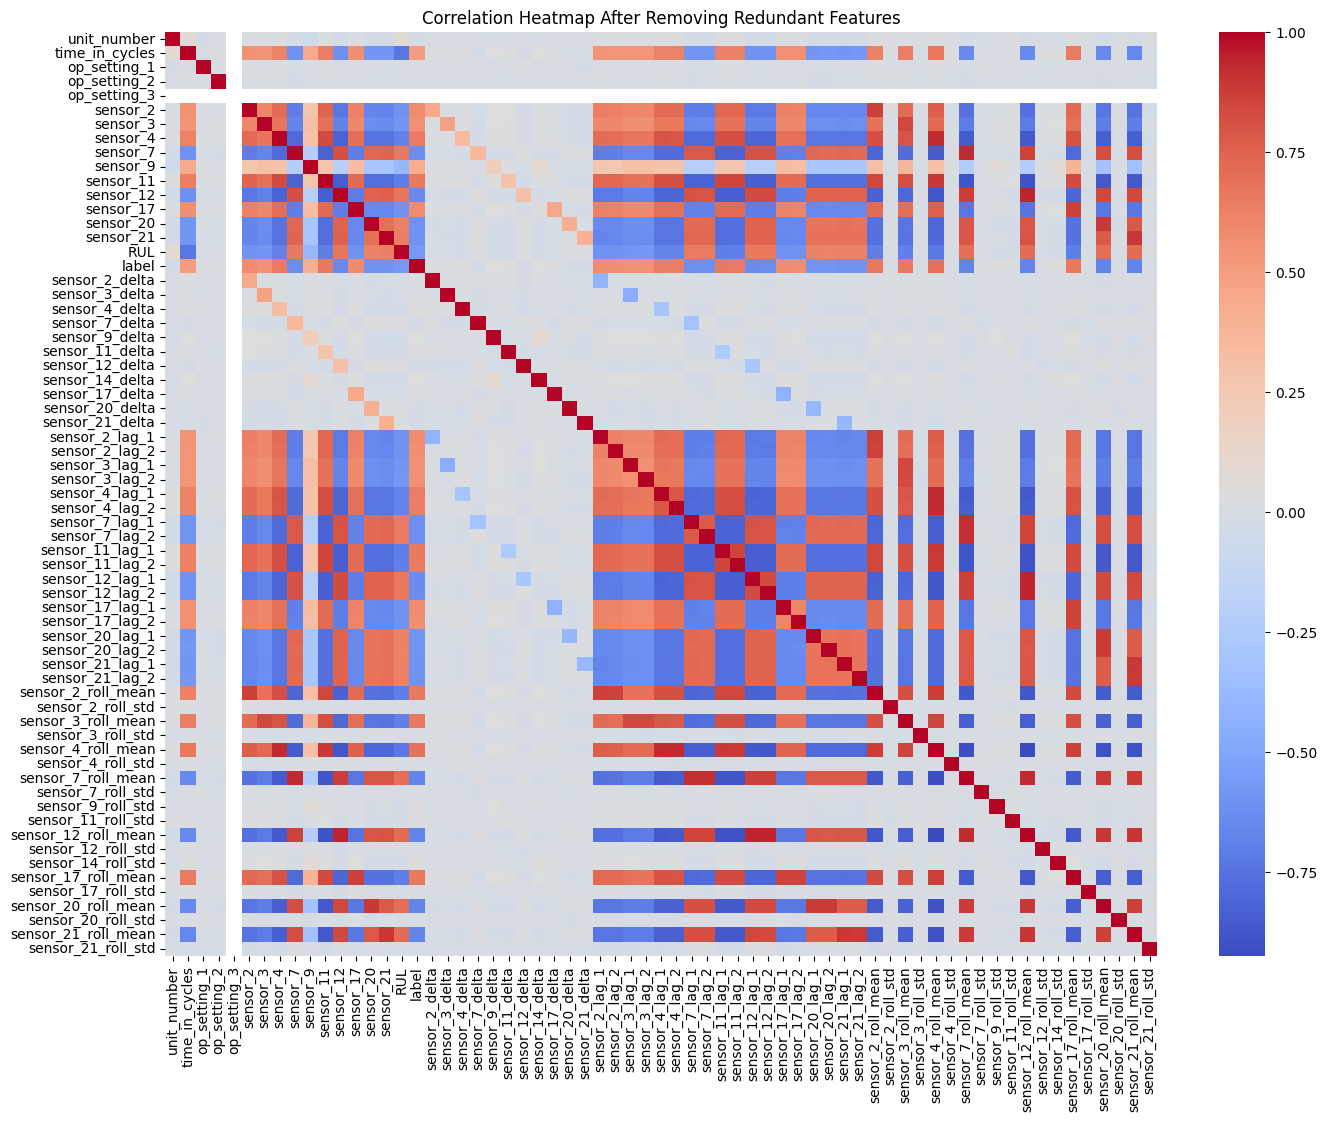

In [18]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_filtered.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap After Removing Redundant Features")
plt.show()

In [19]:
df_filtered.to_csv(f'{BASE_PROCESSED_PATH}/FD001/train_FD001_engineered.csv', index=False)